In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-condition-prediction-dataset/medical_conditions_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/medical-condition-prediction-dataset/medical_conditions_dataset.csv')
df.head(5)

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic


In [3]:
df.isnull()

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,False,False,True,False,False,True,True,True,False
1,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,True,True,False
3,False,False,True,False,False,True,False,True,False
4,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...
9995,False,False,True,False,False,False,False,False,False
9996,False,False,True,False,False,False,True,True,False
9997,False,False,False,False,False,True,False,False,False
9998,False,False,True,False,False,True,True,True,False


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

id                0
full_name         0
age               0
gender            0
smoking_status    0
bmi               0
blood_pressure    0
glucose_levels    0
condition         0
dtype: int64

In [6]:
df

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
22,23,User0023,49.0,male,Non-Smoker,28.025453,119.212083,150.628025,Pneumonia
63,64,User0064,43.0,male,Non-Smoker,34.978378,107.052200,190.482674,Diabetic
84,85,User0085,52.0,male,Smoker,25.024378,131.071030,185.997004,Diabetic
89,90,User0090,70.0,male,Smoker,39.249085,113.848795,124.264664,Pneumonia
153,154,User0154,66.0,male,Smoker,24.333718,173.787158,130.727447,Diabetic
...,...,...,...,...,...,...,...,...,...
9926,9927,User9927,87.0,male,Non-Smoker,27.603302,166.616097,110.249436,Diabetic
9953,9954,User9954,66.0,female,Non-Smoker,35.321225,178.932557,124.810876,Diabetic
9955,9956,User9956,68.0,male,Non-Smoker,36.083177,150.425038,115.163399,Diabetic
9967,9968,User9968,67.0,male,Non-Smoker,36.682144,150.168146,194.475850,Pneumonia


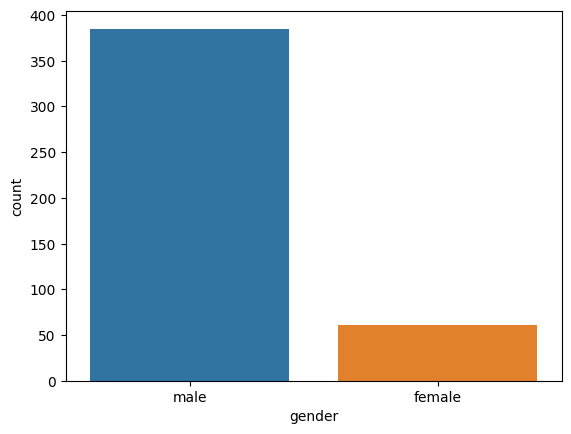

In [7]:
sns.countplot(x='gender',data=df)
plt.show()

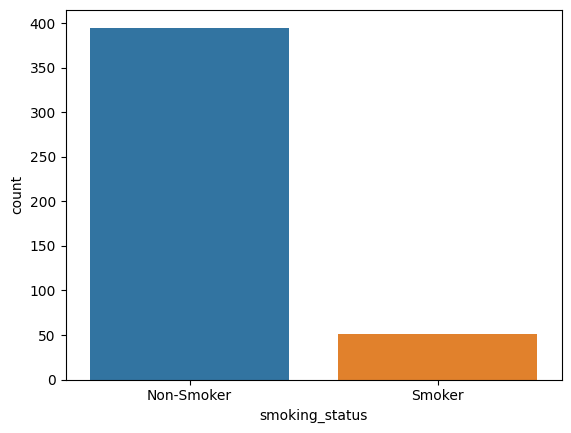

In [8]:
sns.countplot(x='smoking_status',data=df)
plt.show()

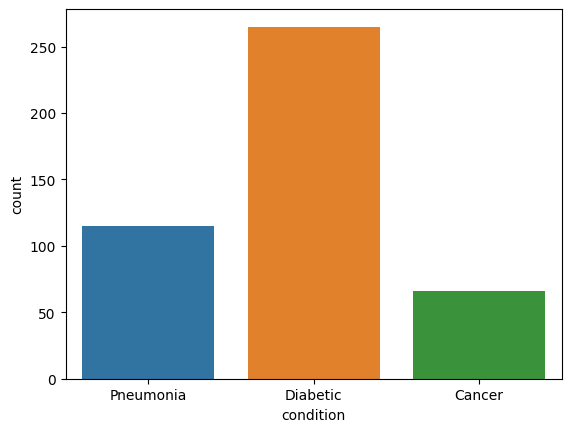

In [9]:
sns.countplot(x='condition',data=df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


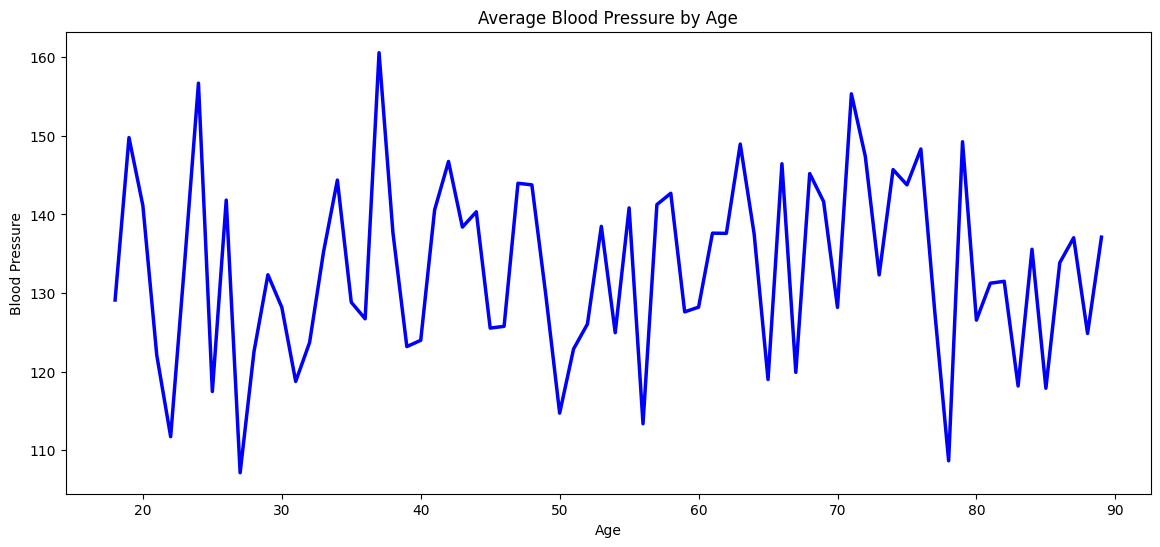

In [10]:
ageblood = df.groupby('age')['blood_pressure'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x = "age", y = "blood_pressure",data = ageblood,color="blue",linewidth = 2.5)
plt.title('Average Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

Not much trend between blood pressure and age.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


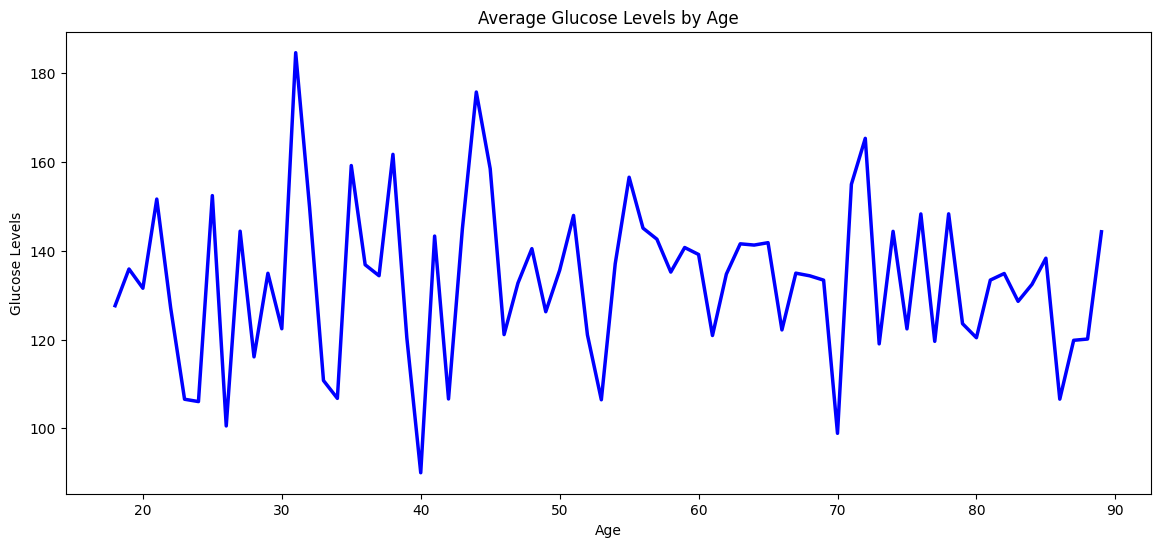

In [11]:
agegluc = df.groupby('age')['glucose_levels'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x = "age", y = "glucose_levels",data = agegluc,color="blue",linewidth = 2.5)
plt.title('Average Glucose Levels by Age')
plt.xlabel('Age')
plt.ylabel('Glucose Levels')
plt.show()

Not much trend between age and glucose levels.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


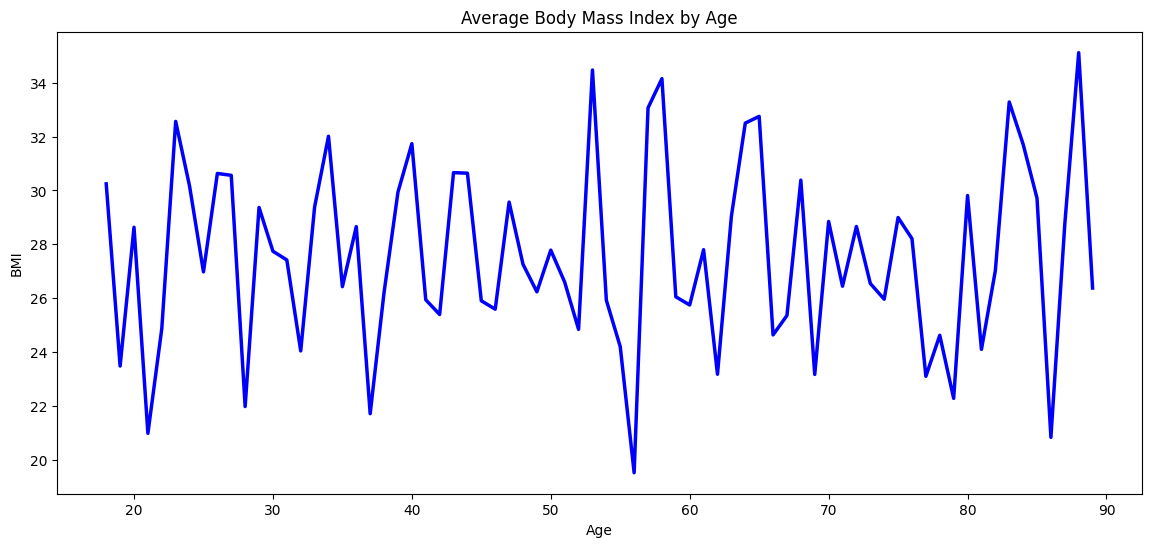

In [12]:
ageblood = df.groupby('age')['bmi'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x = "age", y = "bmi",data = ageblood,color="blue",linewidth = 2.5)
plt.title('Average Body Mass Index by Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Not much trend between age and BMI either.

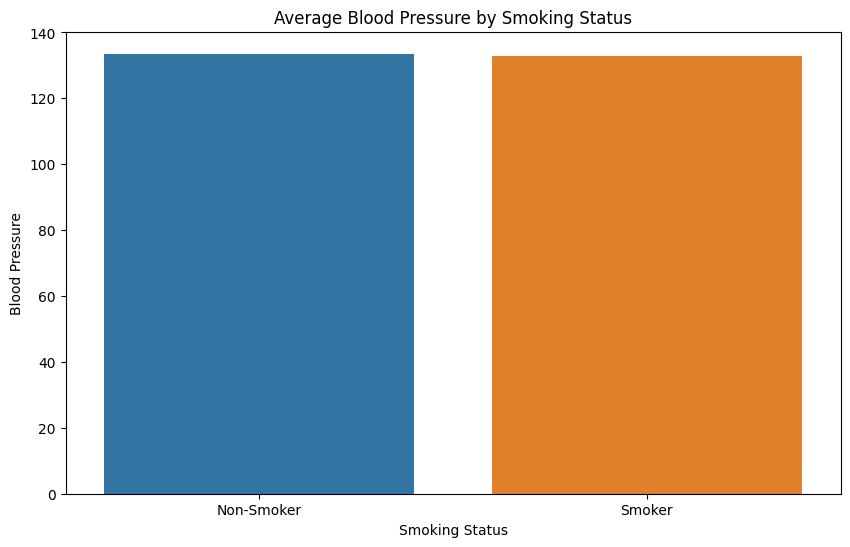

In [13]:
smokeblood = df.groupby('smoking_status')['blood_pressure'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='smoking_status', y='blood_pressure', data=smokeblood)
plt.ylabel('Blood Pressure')
plt.xlabel('Smoking Status')
plt.title('Average Blood Pressure by Smoking Status')
plt.show()

Average blood pressure seems to be even for both non-smokers and smokers.

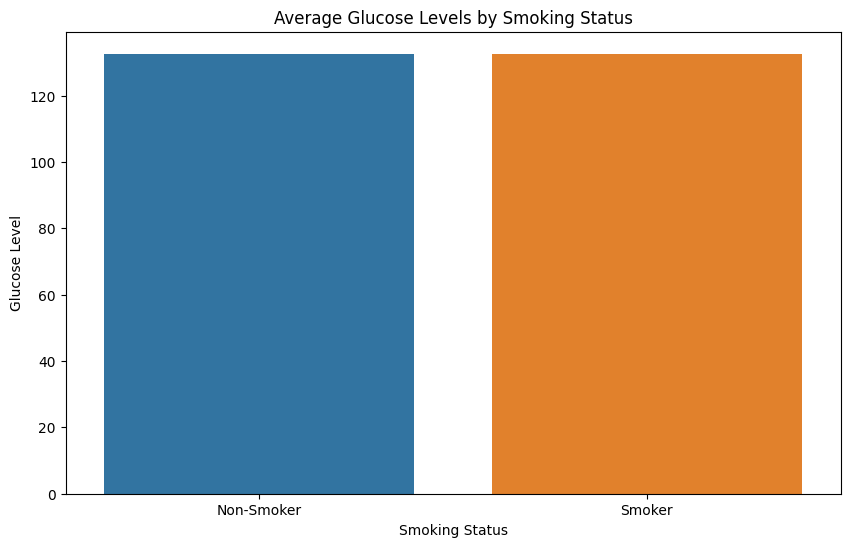

In [14]:
smokeblood = df.groupby('smoking_status')['glucose_levels'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='smoking_status', y='glucose_levels', data=smokeblood)
plt.title('Average Glucose Levels by Smoking Status')
plt.ylabel('Glucose Level')
plt.xlabel('Smoking Status')
plt.show()

Average glucose levels also seem to be the same for both statuses.

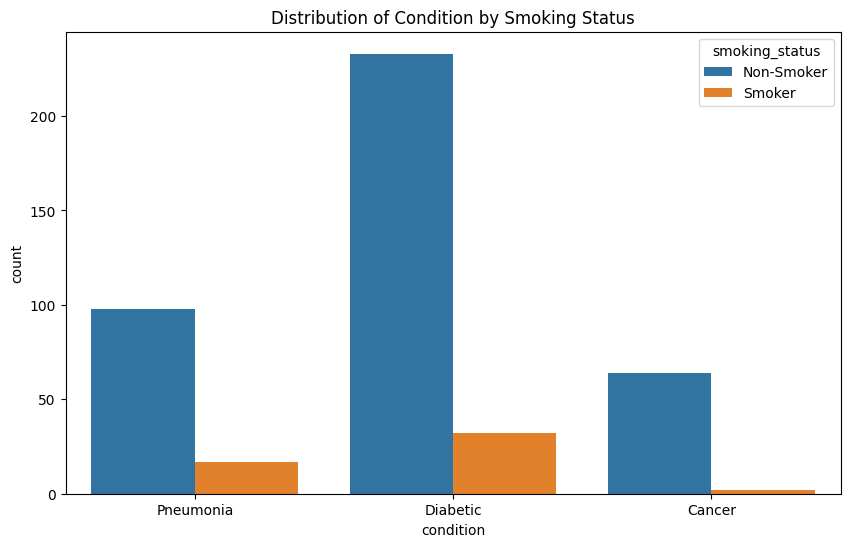

In [15]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Condition by Smoking Status")
plt.xlabel('Condition')
sns.countplot(x='condition', hue='smoking_status', data=df)
plt.show()

More non-smokers in all three conditions, especially in diabetes.

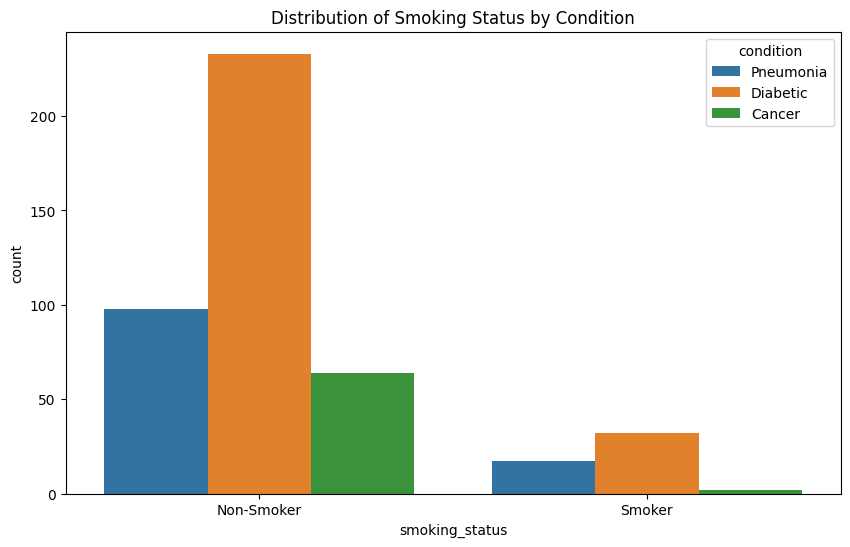

In [16]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Smoking Status by Condition")
plt.xlabel('Smoking Status')
sns.countplot(x='smoking_status', hue='condition', data=df)
plt.show()

Majority of non-smokers surveyed seem to have diabetes while diabetes is also popular among the small amount of smokers surveyed.

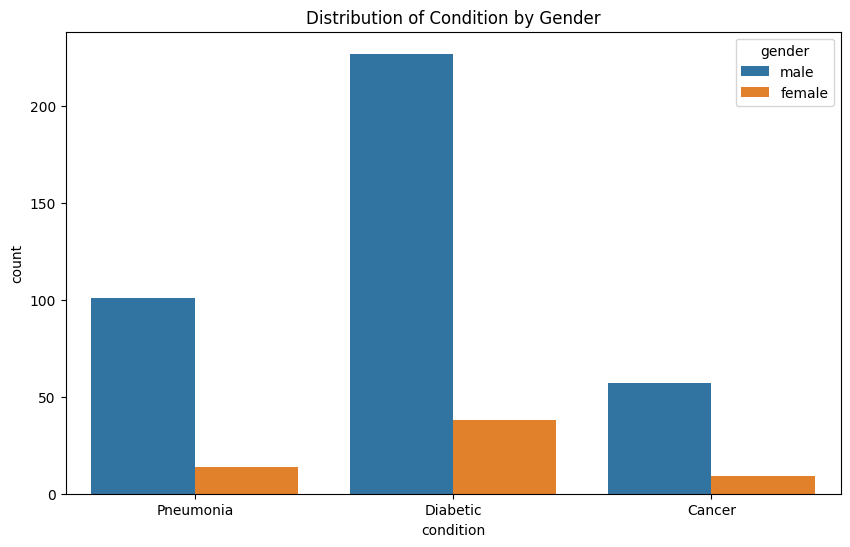

In [17]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Condition by Gender")
sns.countplot(x='condition', hue='gender', data=df)
plt.show()

Males take the majority in all three conditions.

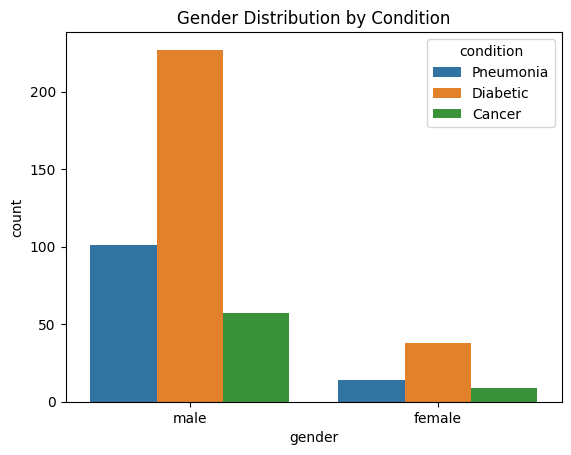

In [18]:
sns.countplot(x='gender', hue='condition', data=df)
plt.title('Gender Distribution by Condition')
plt.show()

Diabetes is extremely popular among males and the small group of females.

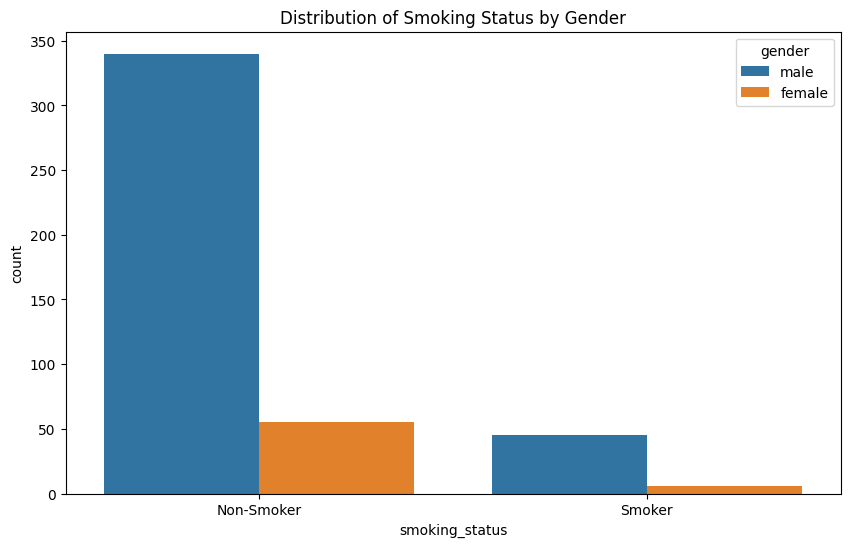

In [19]:
plt.figure(figsize=(10,6))
plt.title("Distribution of Smoking Status by Gender")
sns.countplot(x='smoking_status', hue='gender', data=df)
plt.show()

This data might be biased as the amount of females in this data set is extremely small compared to males

Text(0, 0.5, 'Blood Pressue')

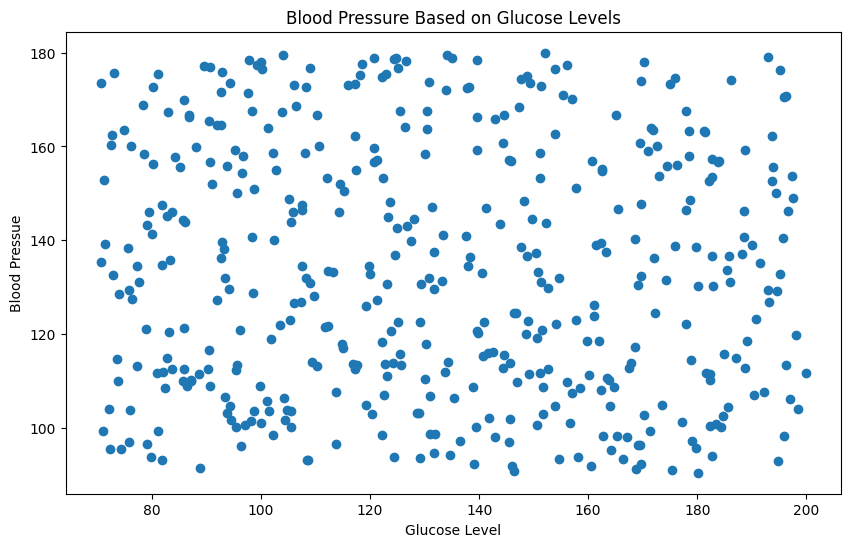

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['glucose_levels'],df['blood_pressure'])
plt.title("Blood Pressure Based on Glucose Levels")
plt.xlabel('Glucose Level')
plt.ylabel('Blood Pressue')


No trend in this plot.

Text(0, 0.5, 'Glucose Levels')

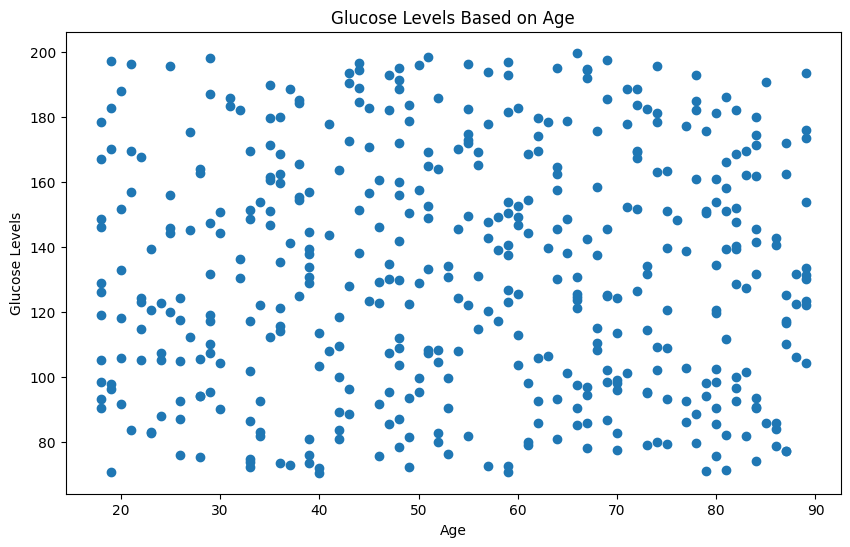

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(df['age'],df['glucose_levels'])
plt.title("Glucose Levels Based on Age")
plt.xlabel('Age')
plt.ylabel('Glucose Levels')

Not much trend here either as expected.

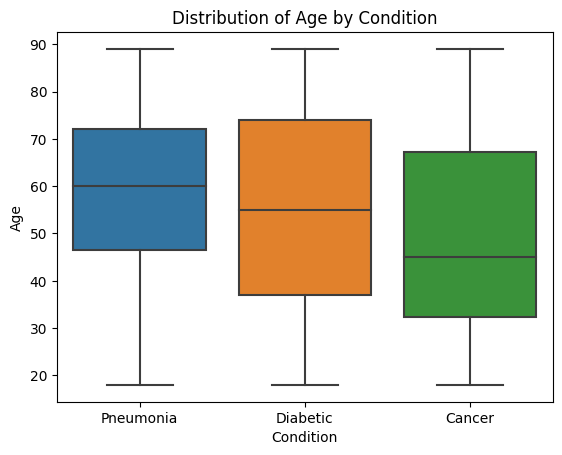

In [22]:
sns.boxplot(x='condition', y='age', data=df)
plt.xlabel('Condition')
plt.ylabel('Age')
plt.title('Distribution of Age by Condition')
plt.show()

Pneumonia has the most specific interquartile range, 50 to 70 years old, while other conditions range much more.

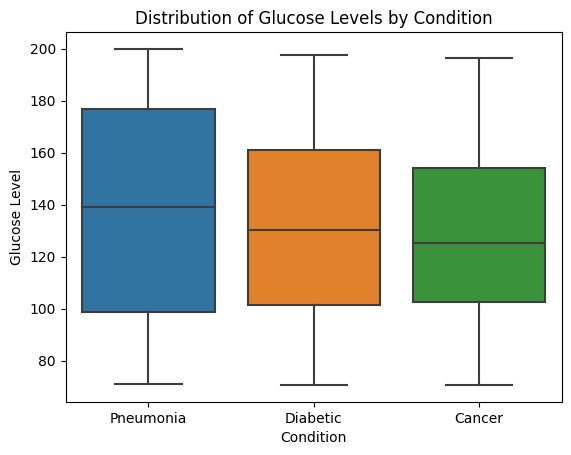

In [23]:
sns.boxplot(x='condition', y='glucose_levels', data=df)
plt.xlabel('Condition')
plt.ylabel('Glucose Level')
plt.title('Distribution of Glucose Levels by Condition')
plt.show()

Cancer and diabetes have the smallest interquartile ranges for glucose levels, 100 to ≈160. Pneumonia is much broader.

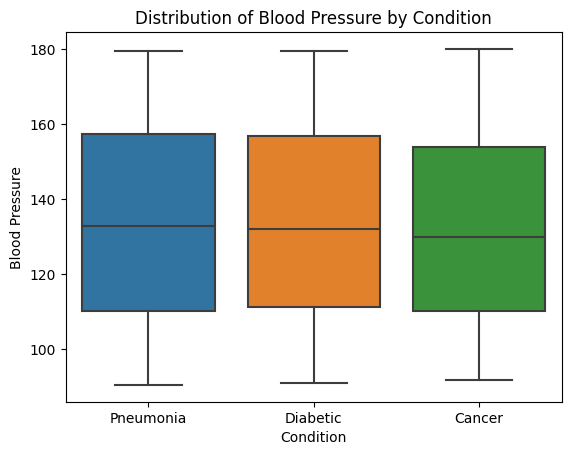

In [24]:
sns.boxplot(x='condition', y='blood_pressure', data=df)
plt.xlabel('Condition')
plt.ylabel('Blood Pressure')
plt.title('Distribution of Blood Pressure by Condition')
plt.show()

Not much variation in each box plot.

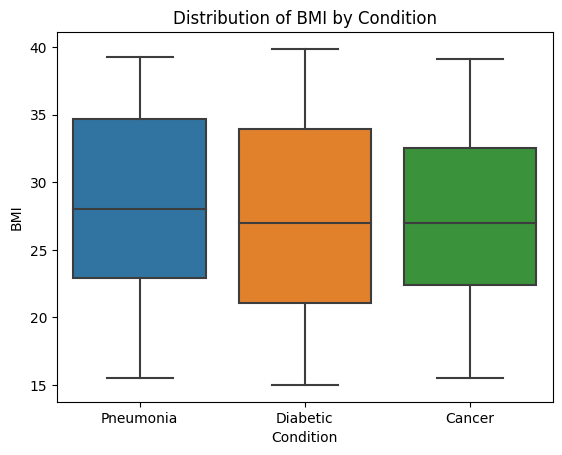

In [25]:
sns.boxplot(x='condition', y='bmi', data=df)
plt.xlabel('Condition')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Condition')
plt.show()

Cancer has the smallest interquartile range for BMI, ranging from ≈24 to ≈33. The other conditions are a bit broader.

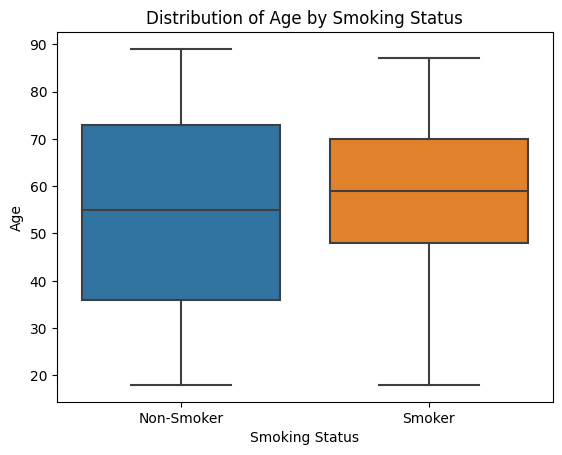

In [26]:
sns.boxplot(x='smoking_status', y='age', data=df)
plt.title('Distribution of Age by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.show()

Smokers have a very narrow interquartile age range, ranging from ≈50 to ≈70 years old. Non-smokers have a broad range.

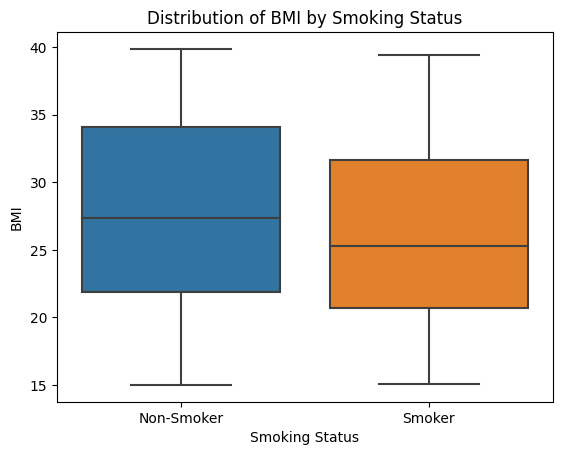

In [27]:
sns.boxplot(x='smoking_status', y='bmi', data=df)
plt.title('Distribution of BMI by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.show()

Both non-smokers and smokers have the about the same BMI.

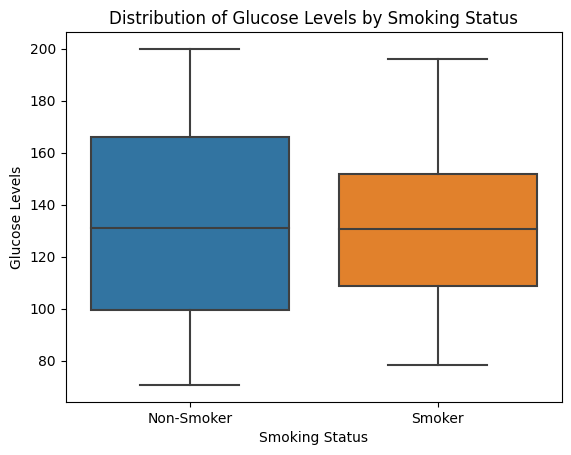

In [28]:
sns.boxplot(x='smoking_status', y='glucose_levels', data=df)
plt.title('Distribution of Glucose Levels by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Glucose Levels')
plt.show()

Smokers have a much narrower interquartile glucose range, ranging from ≈110 to ≈150. Non-smokers are again much broader in the IQR.

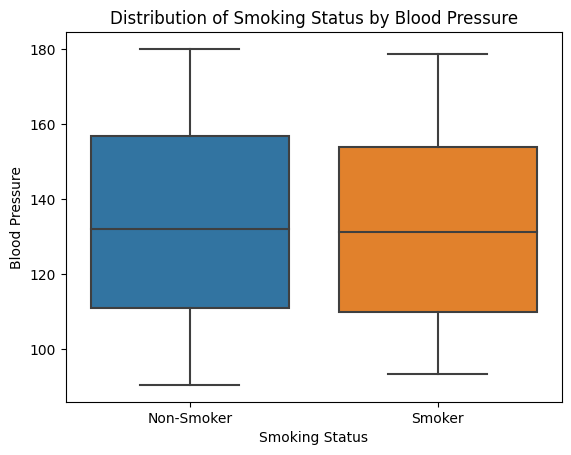

In [29]:
sns.boxplot(x='smoking_status', y='blood_pressure', data=df)
plt.title('Distribution of Smoking Status by Blood Pressure')
plt.xlabel('Smoking Status')
plt.ylabel('Blood Pressure')
plt.show()

Blood pressure, for the most part, is the same among non-smokers and smokers.

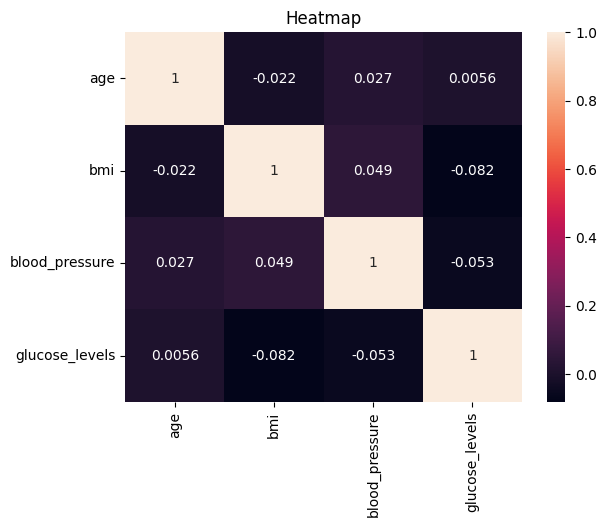

In [30]:
corrm = df[['age', 'bmi', 'blood_pressure', 'glucose_levels']].corr()
sns.heatmap(corrm, annot=True)
plt.title('Heatmap')
plt.show()

There doesn't seem to be any strong correlations among any variables.

**Conclusions (Relevant findings)**


**Males are much higher in numbers than females in this data set, non-smokers are also higher in number than smokers, and people with diabetes outnumber the other conditions in this data set. These variables may bias the analysis.**



-Non-smokers dominate smokers in all three conditions according to a bar graph.

-Majority of non-smokers surveyed seem to have diabetes while diabetes is also popular among the small amount of smokers surveyed.

-Males are majority in all three conditions.

-Diabetes is extremely popular among males and the small group of females.

-Pneumonia has the most specific interquartile range, 50 to 70 years old, while other conditions range much more.

-Cancer and diabetes have the smallest interquartile ranges for glucose levels, 100 to ≈160.

-Cancer has the smallest interquartile range for BMI, ranging from ≈24 to ≈33. The other conditions are pretty broad.

-Smokers have a very narrow interquartile age range, ranging from ≈50 to ≈70 years old. Non-smokers have a broad range.

-Smokers have a much narrower interquartile glucose range, ranging from ≈110 to ≈150. Non-smokers are again much broader in the IQR.



Thanks for reading my notebook! An upvote is greatly appreciated, as I've recently started learning about data science and am working toward notebooks expert. You may also check out my other projects I've recently made.